# __Exploratory Data Analysis__

### _Data Cleaning and Preprocessing:_

- No null values present.  
- No duplicate rows present.  
- Minimal data cleaning required.  
- Dataset contains 7 columns and 1,000 rows.  
- One-hot encoding applied to convert two columns (Building Type and Day of Week) from object to integer data types.

### _Data visualization:_

- **Heatmap**: Used for visualizing the correlation matrix.  
- **Pair Plot**: Displays pairwise relationships between features.  
- **Hist Plot**: Shows the distribution of energy consumption.  
- **Box Plot**:  
  - Visualizes energy consumption by building type.  
  - Visualizes energy consumption by day of the week.  
- **Joint Plot**:  
  - Shows relationships between square footage, appliances used, number of occupants, average temperature, and energy consumption.  
- **Bar Plot**:  
  - Compares energy consumption, average temperature, and square footage across days of the week with building type as a hue.

### _Correlation analysis:_

- Strong positive correlation between square footage and energy consumption.  
- Moderate positive correlation between the number of occupants, appliances used, and industrial building type with energy consumption.  
- Weak correlation between the day of the week and average temperature with energy consumption.  
- Very weak correlation between residential building type and energy consumption.

### _Conclusions:_

- Energy consumption shows the highest correlation with square footage.
- Building Type: Industrial buildings have the highest energy consumption, followed by commercial buildings with moderate consumption, while residential buildings have the lowest consumption.
- There is minimal difference in energy consumption between weekdays and weekends, with weekends showing slightly lower consumption.
- The distribution of energy consumption is approximately normal, with a few instances of very high or very low values. Most values lie between 3000 and 5000.
- Energy consumption increases with the increase in square footage, number of appliances, and occupants.
- Average temperature is nearly the same across all building types, yet industrial buildings consume more energy compared to other building types.
- Despite residential and industrial buildings having higher square footage than commercial buildings, energy consumption trends differ across these types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train_energy_data.csv")

## Understanding the Data set

In [3]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [4]:
df.shape

(1000, 7)

In [5]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [6]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [7]:
df.dtypes

Building Type           object
Square Footage           int64
Number of Occupants      int64
Appliances Used          int64
Average Temperature    float64
Day of Week             object
Energy Consumption     float64
dtype: object

In [8]:
print(df['Building Type'].unique())
print(df['Day of Week'].unique())

['Residential' 'Commercial' 'Industrial']
['Weekday' 'Weekend']


Changing datatype of Building Type and Day of Week from object by One hot encoding

In [9]:
Df = pd.get_dummies(df, columns=['Building Type','Day of Week'], drop_first=True) 
Df

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False
...,...,...,...,...,...,...,...,...
995,14419,68,44,23.95,3661.21,False,True,True
996,12194,7,22,14.67,3546.34,True,False,True
997,39562,88,20,32.18,5147.21,False,False,False
998,8348,67,37,16.48,3244.98,False,True,True


In [10]:
Df.columns

Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature', 'Energy Consumption', 'Building Type_Industrial',
       'Building Type_Residential', 'Day of Week_Weekend'],
      dtype='object')

In [11]:
Df['Building Type_Industrial']=Df['Building Type_Industrial'].astype('int64')
Df['Building Type_Residential']=Df['Building Type_Residential'].astype('int64')
Df['Day of Week_Weekend']=Df['Day of Week_Weekend'].astype('int64')

In [12]:
Df.dtypes

Square Footage                 int64
Number of Occupants            int64
Appliances Used                int64
Average Temperature          float64
Energy Consumption           float64
Building Type_Industrial       int64
Building Type_Residential      int64
Day of Week_Weekend            int64
dtype: object

In [13]:
Df.isnull().sum()

Square Footage               0
Number of Occupants          0
Appliances Used              0
Average Temperature          0
Energy Consumption           0
Building Type_Industrial     0
Building Type_Residential    0
Day of Week_Weekend          0
dtype: int64

No missing values

In [14]:
Df.duplicated().sum()

0

No duplicated rows

## Data Visualization

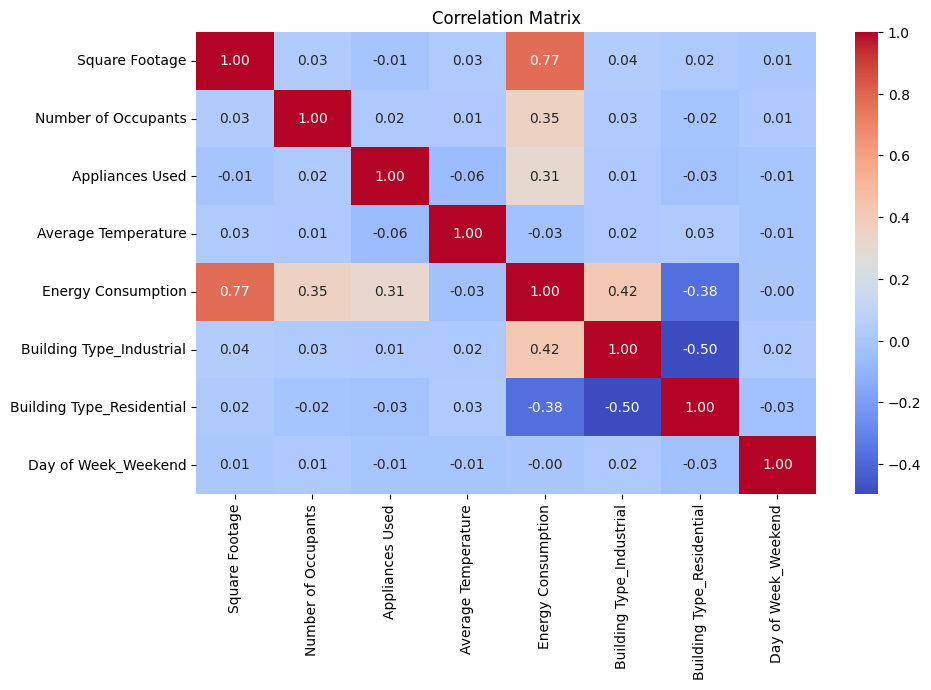

In [42]:
correlation_matrix =Df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

There is a strong positive correlation between Square Footage and Energy Consumption.
Number of Occupants, Appliances Used and Industrial Building Type show moderate correlations with energy usage.
Days of week and average temperature shows low and residential building shows very low correlation with Energy Consumption

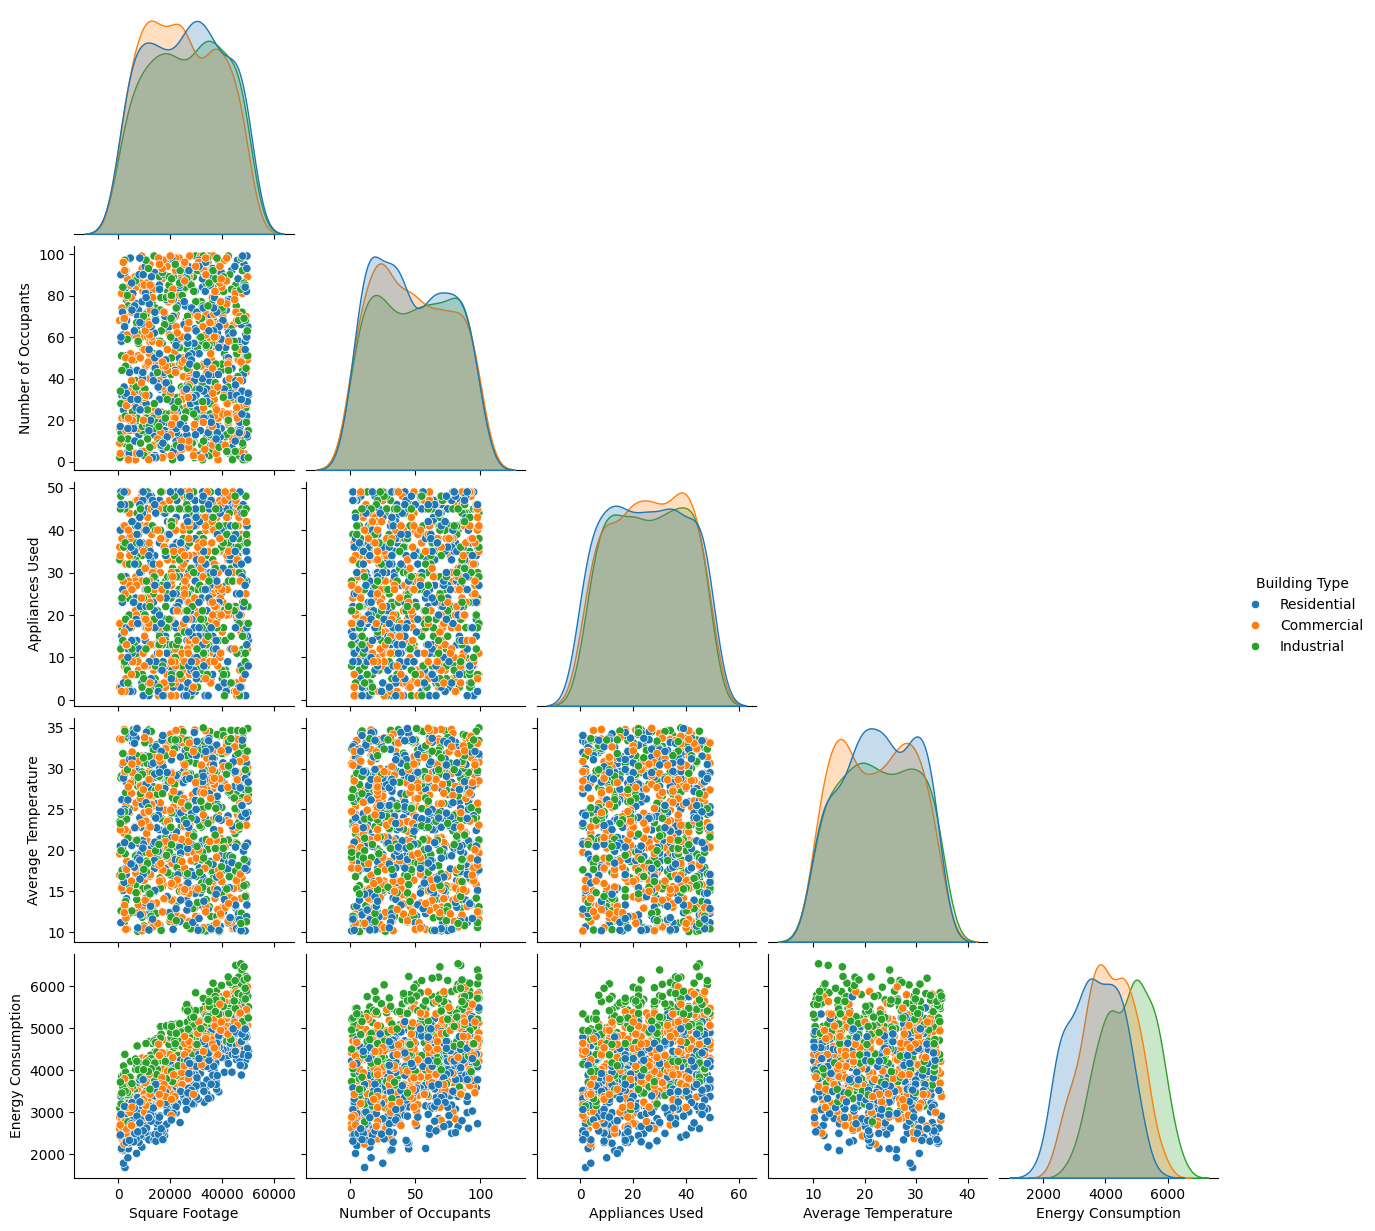

In [51]:
sns.pairplot(df,corner=True,hue='Building Type')
plt.show()

Residential buildings have lowest energy consumptions and Industrial have the highest.
Square Footage have strong positive correlation with Energy Consumption. Number of Occupants and Appliances Used also have moderate correlations but Average Temperature seem to have low correlations.

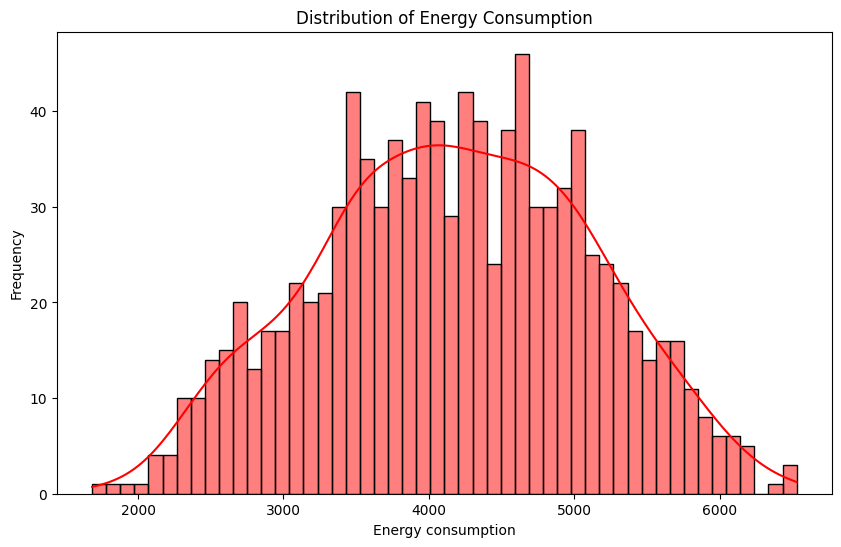

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy Consumption'], kde=True,color='red', bins=50)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy consumption')
plt.ylabel('Frequency')
plt.show()

C:\Users\Diya\AppData\Local\Temp\ipykernel_15388\1290141516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Building Type', y='Energy Consumption', data=df, palette=palette)


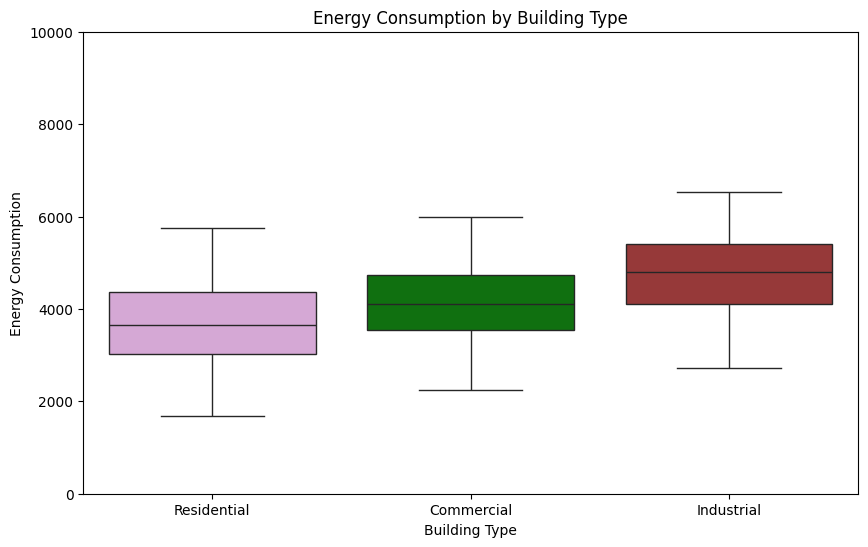

In [81]:
plt.figure(figsize=(10, 6))
palette = ['plum', 'green', 'brown']
sns.boxplot(x='Building Type', y='Energy Consumption', data=df, palette=palette)
plt.title('Energy Consumption by Building Type')
plt.ylim(0,10000)
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption')
plt.show() 

Commercial and Industrial buildings tend to consume more energy than Residential buildings.

C:\Users\Diya\AppData\Local\Temp\ipykernel_15388\1631942779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Energy Consumption', data=df,palette=palette)


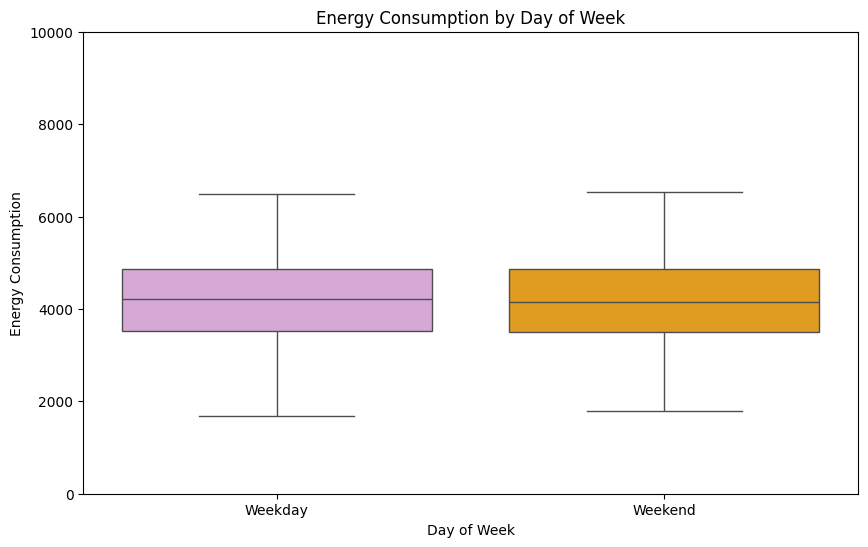

In [80]:
plt.figure(figsize=(10,6))
palette = ['plum', 'orange']
sns.boxplot(x='Day of Week', y='Energy Consumption', data=df,palette=palette)
plt.title('Energy Consumption by Day of Week')
plt.ylim(0,10000)
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.show()

Almost same Energy Consumption for both Weekday and weekend.

NO OUTLIERS FOUND

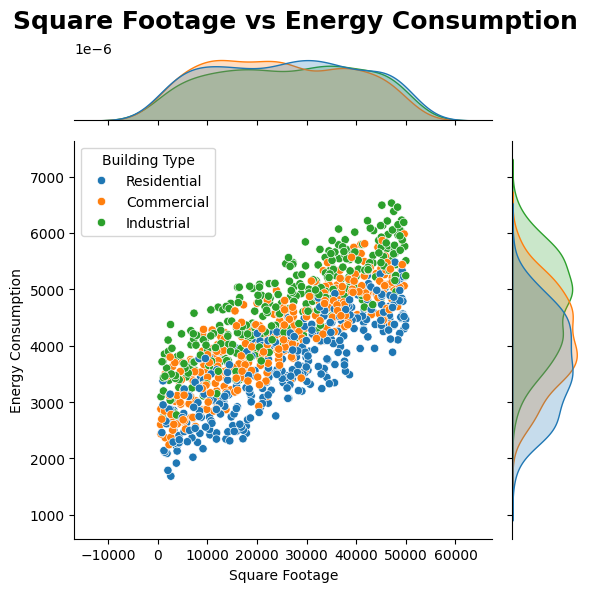

In [74]:

joint=sns.jointplot(x=df['Square Footage'],y=df['Energy Consumption'],kind='scatter',hue=df['Building Type'])
joint.fig.suptitle('Square Footage vs Energy Consumption', weight='bold', size=18)
joint.fig.tight_layout()

#  title slightly higher to avoid overlap
joint.fig.subplots_adjust(top=0.90)

plt.show()

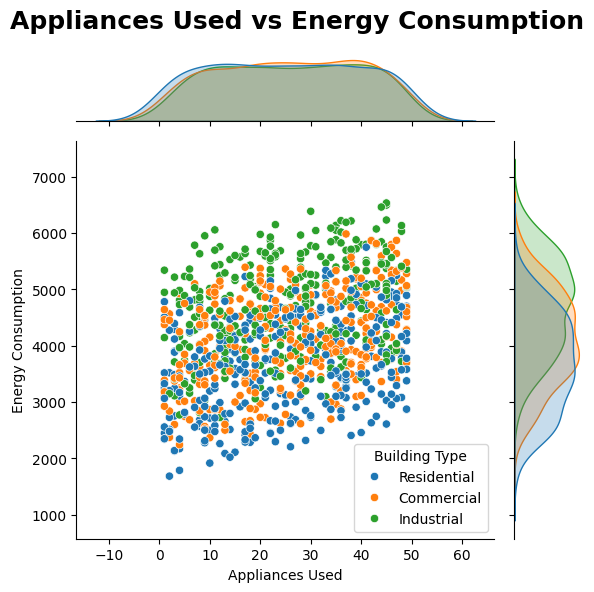

In [75]:
joint=sns.jointplot(x=df['Appliances Used'],y=df['Energy Consumption'],hue=df['Building Type'])
joint.fig.suptitle('Appliances Used vs Energy Consumption', weight='bold', size=18)
joint.fig.tight_layout()
joint.fig.subplots_adjust(top=0.90)

plt.show()

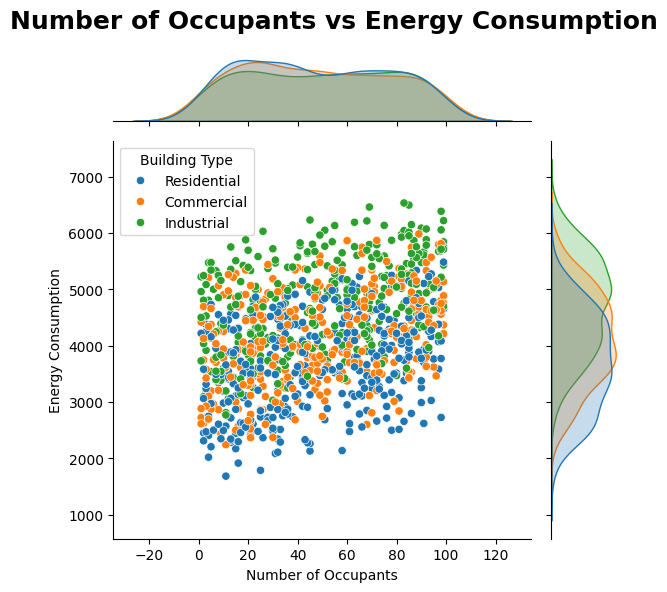

In [91]:
joint=sns.jointplot(x=df['Number of Occupants'],y=df['Energy Consumption'],hue=df['Building Type'])
joint.fig.suptitle('Number of Occupants vs Energy Consumption', weight='bold', size=18)
joint.fig.tight_layout()
joint.fig.subplots_adjust(top=0.90)

plt.show()

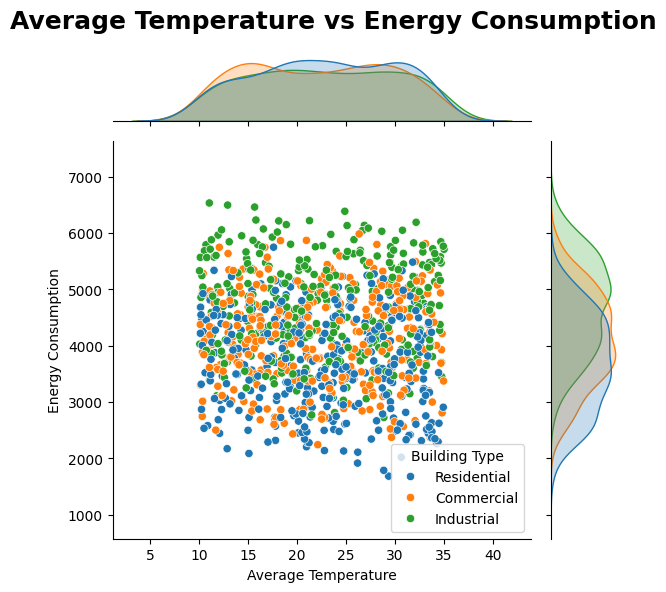

In [76]:
joint=sns.jointplot(x=df['Average Temperature'],y=df['Energy Consumption'],hue=df['Building Type'])
joint.fig.suptitle('Average Temperature vs Energy Consumption', weight='bold', size=18)
joint.fig.tight_layout()
joint.fig.subplots_adjust(top=0.90)

plt.show()

In [77]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

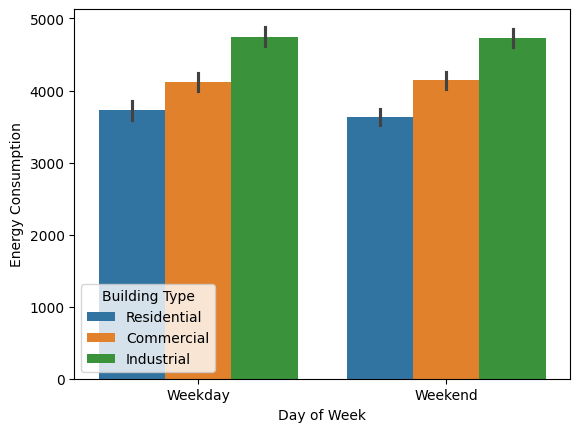

In [88]:
sns.barplot(x="Day of Week",y="Energy Consumption",data=df,hue='Building Type')
plt.show()

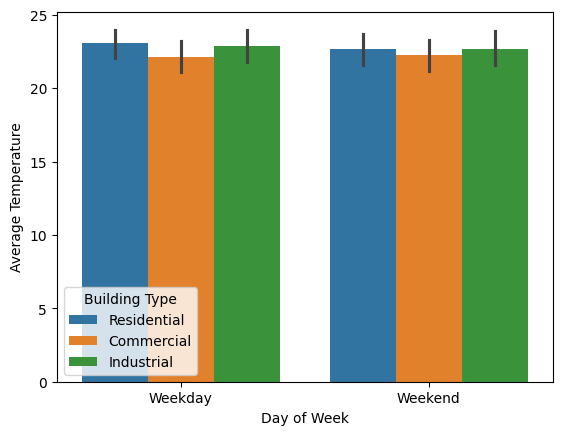

In [89]:
sns.barplot(x="Day of Week",y="Average Temperature",data=df,hue='Building Type')
plt.show()

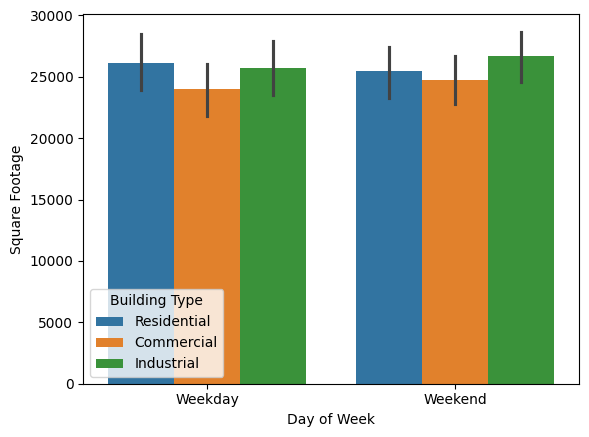

In [90]:
sns.barplot(x="Day of Week",y="Square Footage",data=df,hue='Building Type')
plt.show()